In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


In [4]:
%pip install pandas_datareader 

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------- 109.5/109.5 kB 92.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas_datareader as data

In [16]:
%pip install  TimeSeries

%pip install alpha_vantage


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 327.1/327.1 kB 431.7 kB/s eta 0:00:00
     -------------------------------------- 61.7/61.7 kB 553.4 kB/s eta 0:00:00
     -------------------------------------- 44.7/44.7 kB 555.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install yfinance


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
import yfinance as yf


symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2023-09-20'

df = yf.download(symbol, start=start_date, end=end_date)

print(df.head())


[*********************100%%**********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.487533  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.498751  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.395378  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.383555  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.425995  447610800


In [29]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-13,176.509995,177.300003,173.979996,174.210007,174.210007,84267900
2023-09-14,174.000000,176.100006,173.580002,175.740005,175.740005,60895800
2023-09-15,176.479996,176.500000,173.820007,175.009995,175.009995,109205100
2023-09-18,176.479996,179.380005,176.169998,177.970001,177.970001,67257600
2023-09-19,177.520004,179.630005,177.130005,179.070007,179.070007,51826900


In [30]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487533,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498751,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395378,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425995,447610800


In [31]:
df = df.drop(['Date','Adj Close'],axis =1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


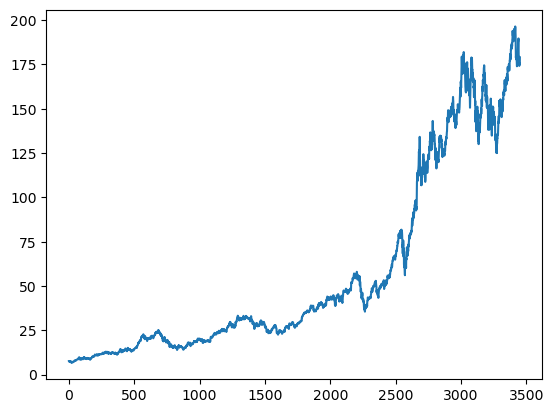

In [32]:
plt.plot(df.Close)

In [33]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3446    181.2446
3447    181.3518
3448    181.4486
3449    181.5906
3450    181.7437
Name: Close, Length: 3451, dtype: float64

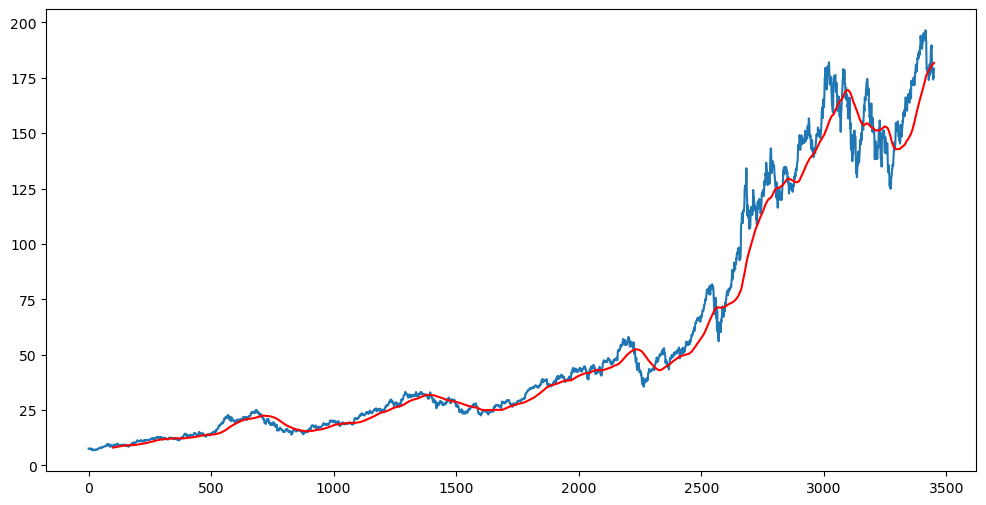

In [34]:
plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [35]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3446    164.44735
3447    164.58550
3448    164.73945
3449    164.92345
3450    165.07865
Name: Close, Length: 3451, dtype: float64

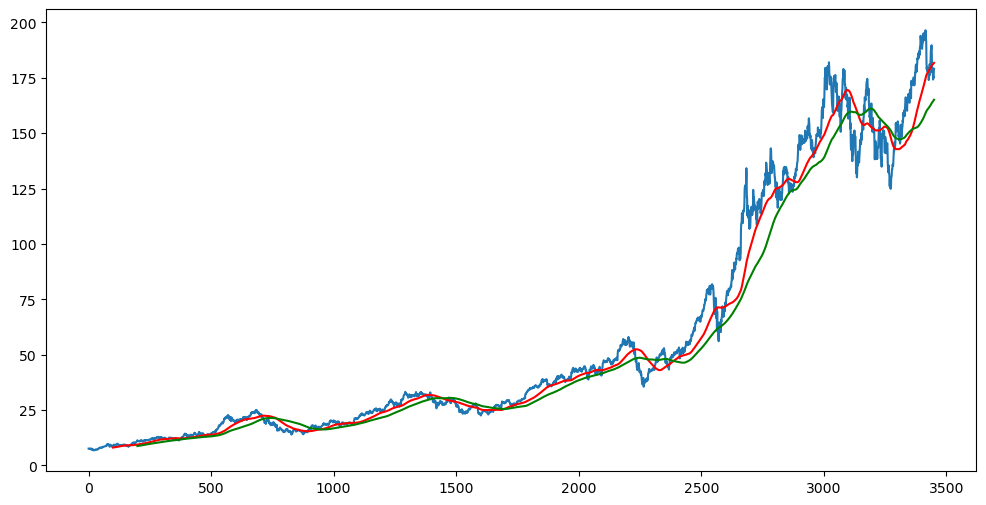

In [36]:
plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [37]:
df.shape

(3451, 5)

In [40]:
data_training =pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing =pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2415, 1)
(1036, 1)


In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [44]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.81073548],
       [0.82862106],
       [0.83859003]])

In [46]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train),np.array(y_train)    

#ML Model

In [47]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [49]:
model = Sequential()
model.add(LSTM(units =50 ,activation = 'relu',return_sequences =True,
              input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units =60 ,activation = 'relu',return_sequences =True,
              input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.3))


model.add(LSTM(units =80 ,activation = 'relu',return_sequences =True))
model.add(Dropout(0.4))


model.add(LSTM(units =120 ,activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units =1))

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [54]:
model.compile(optimizer='adam', loss ='mean_squared_error')
model.fit(x_train,y_train ,epochs =50)

Epoch 1/50
73/73 [==============================] - 14s 146ms/step - loss: 0.0352
Epoch 2/50
73/73 [==============================] - 11s 145ms/step - loss: 0.0083
Epoch 3/50
73/73 [==============================] - 11s 145ms/step - loss: 0.0066
Epoch 4/50
73/73 [==============================] - 11s 144ms/step - loss: 0.0055
Epoch 5/50
73/73 [==============================] - 11s 145ms/step - loss: 0.0057
Epoch 6/50
73/73 [==============================] - 10s 144ms/step - loss: 0.0052
Epoch 7/50
73/73 [==============================] - 11s 144ms/step - loss: 0.0048
Epoch 8/50
73/73 [==============================] - 11s 145ms/step - loss: 0.0049
Epoch 9/50
73/73 [==============================] - 11s 151ms/step - loss: 0.0046
Epoch 10/50
73/73 [==============================] - 11s 155ms/step - loss: 0.0042
Epoch 11/50
73/73 [==============================] - 11s 156ms/step - loss: 0.0041
Epoch 12/50
73/73 [==============================] - 11s 157ms/step - loss: 0.0041
Epoch 13/50
7

In [55]:
model.save('keras_model.h5')

In [56]:
past_100_days =data_training.tail(100)

In [60]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [61]:
final_df.head()

,Close
0,47.005001
1,46.632500
2,47.040001
3,48.772499
4,47.762501


In [62]:
input_data =scaler.fit_transform(final_df)
input_data

array([[0.02403266],
       [0.02159999],
       [0.02426123],
       ...,
       [0.85998365],
       [0.87931431],
       [0.88649802]])

In [63]:
input_data.shape

(1136, 1)

In [64]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [65]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1036, 100, 1)
(1036,)


Making Predictions


In [66]:
y_predicted =model.predict(x_test)

y_predicted.shape

33/33 [==============================] - 2s 46ms/step


(1036, 1)

In [68]:
y_test

array([0.04919182, 0.04520817, 0.0443755 , ..., 0.85998365, 0.87931431,
       0.88649802])

In [69]:
y_predicted

array([[0.09554794],
       [0.09552068],
       [0.09539583],
       ...,
       [0.8075385 ],
       [0.7958915 ],
       [0.78612566]], dtype=float32)

In [70]:
scaler.scale_

array([0.00653061])

In [71]:
scale_factor =1/0.00653061
y_predicted =y_predicted * scale_factor
y_test = y_test *scale_factor

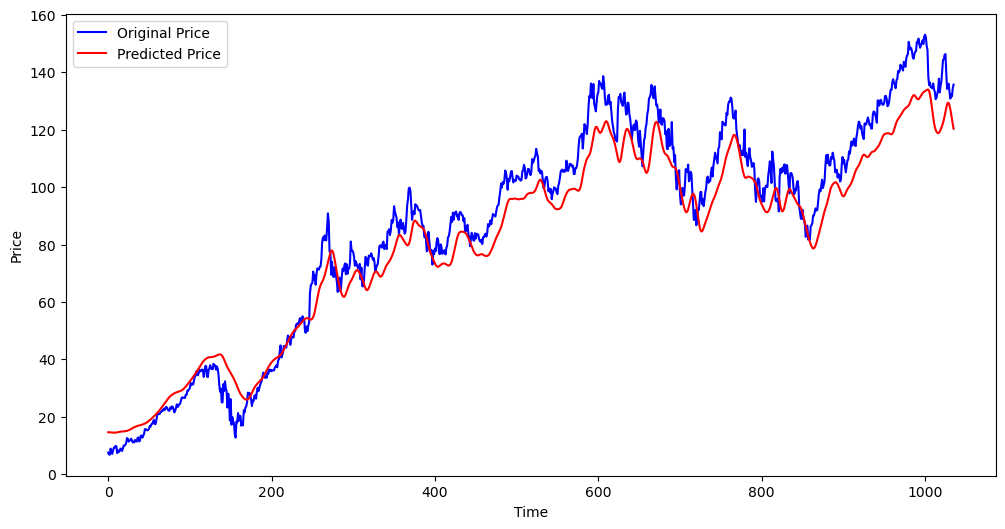

In [72]:
plt.figure(figsize =(12,6))
plt.plot(y_test,'b',label ='Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
